<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [0]:
directory = "student"
if (directory == "student"):
  %cd drive/My\ Drive/Colab\ Notebooks/data-science-track/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science/Course/Data-Science-Track

/content/drive/Shared drives/Rubrik/Data Science/Course/Data-Science-Track


<hr>

# Feature Engineering

<hr>

After cleaning the dataset, the next step is to engineer features that can help our predictive models. 

<br>

**<span style="color:tomato;font-weight:bold">Feature engineering</span> is the practice of creating new features from existing ones.**

**The engineered features are often more specific or isolate key information.**

<br>

Often, feature engineering is one of the most valuable tasks a data scientist can do to improve model effectiveness.

This is not an exhaustive list of all types of feature engineering. There are limitless possibilities for this step, and it's a skill that will naturally improve as you gain more experience and domain expertise. However, you can use this checklist as a reliable starting point!



<br><hr id="toc">

### In this lesson...

We'll load our cleaned dataset and then cover these steps: 

1. [Start with domain knowledge](#domain)
2. [Create interaction features](#interaction)
3. [Group sparse classes](#group)
4. [Encode dummy variables](#dummy)
5. [Remove unused or redundant features](#remove)

Finally, we'll save the augmented dataframe (analytical base table) to a new file so we can use it for modeling.

<br><hr>

## Import libraries 

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

In [0]:
# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Library Configurations: 
sns.set() # make seaborn override the styling of matplotlib graphs
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows

## Import the **cleaned** dataset that we created in the previous module.
- Use pandas' `read_csv()` function 
- Provide the following path for the data 
```python 
path = './data/real_estate_clean.csv'
```

In [0]:
# Load cleaned dataset
df = pd.read_csv(filepath_or_buffer='./data/real_estate_clean.csv')

<hr>

<br>

### Understand the data
#### Print the head of the dataset

In [0]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


#### Display the dimensions of the dataset.
- Use the `.shape` property of the DataFrame to find out the shape of the dataset

In [0]:
# Dataframe dimensions
df.shape

(1883, 26)

#### Display the data types of our features
- Use the DataFrame's `info()` method to find out more about the DataFrame, such as the column data types and column names 

In [0]:
# Column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
tx_price              1883 non-null int64
beds                  1883 non-null int64
baths                 1883 non-null int64
sqft                  1883 non-null int64
year_built            1883 non-null int64
lot_size              1883 non-null int64
property_type         1883 non-null object
exterior_walls        1660 non-null object
roof                  1529 non-null object
basement              1883 non-null float64
restaurants           1883 non-null int64
groceries             1883 non-null int64
nightlife             1883 non-null int64
cafes                 1883 non-null int64
shopping              1883 non-null int64
arts_entertainment    1883 non-null int64
beauty_spas           1883 non-null int64
active_life           1883 non-null int64
median_age            1883 non-null float64
married               1883 non-null float64
college_grad          1883 non-null float64


<hr>

[**Back to Contents**](#toc)


<br id="domain">

## Start with domain knowledge

You can often engineer informative features by tapping into your (or 'others') expertise about the domain.

<br>

One thing we can do with DataFrames is we can create new columns based off of existing data in the DataFrame.

Specifically we can use a DataFrame's method called `astype()` to convert data points to a desired type. More technically the method will cast a pandas object to a specified dtype `dtype`.

#### astype() parameters:
- dtype (`dtype`): desired dtype to convert values to

We will create an indicator variable (numeric variable that represents categorical data) to flag properties with 2 beds and 2 baths.

We will achieve this by creating a boolean series through filtering the DataFrame with a specific condition and then will cast the boolean values to a integer. Where `True` is equivilant to `1` and `False` is equivalant to `0`. 

You can create a new indicator variable series (column) with the `astype()` method based off of a specific condition with the following syntax: 

```python
df['new_column_name'] = ((condition)).astype(dtype=int)
```

Again, if we specify `int` as an argument to the `dtype` parameter then if the condition is `True` the observation will have a value in the new column equivilant to `1` and if the condition is `False` the observation will have a value in the new column equivalant to `0`. 

<br> 

**Note: when we filter a DataFrame with multiple conditions let us use the following syntax:**
```python 
((condition_one) & (condition_two)) 
```

#### Example:
```python
# Create indicator variable for properties with at least 3 bedrooms and a basement
df["three_beds"] = ((df['beds'] >= 3) & (df['basement'] == 1)).astype(int)
```

<br>

### Your Turn
**Create an indicator variable to flag properties with 2 beds and 2 baths and name it <code style="color:steelblue">'two_and_two'</code>.**

In [0]:
# Create indicator variable for properties with 2 beds and 2 baths
df["two_and_two"] = ((df['beds'] == 2) & (df['baths'] == 2)).astype(int)

<br> 

### Display the proportion of our observations that have 2 beds and 2 baths
- Use the series' `mean()` method to accomplish this 

In [0]:
# Display percent of rows where two_and_two == 1
df["two_and_two"].mean()

0.09453000531067446

**Next, let's engineer an indicator feature for the housing market recession.**


### Create a new feature called <code style="color:steelblue">'during_recession'</code> to indicate if a transaction falls between 2009 and 2013.
1. Create a boolean series mask to check if <code style="color:steelblue">tx_year >= 2009</code>
2. Create a boolean series mask to check if <code style="color:steelblue">tx_year <= 2013</code>
3. Combine the two masks with an <code style="color:steelblue">&</code> operator.
  **Note:  when we filter a DataFrame with multiple conditions let us use the following syntax:**
```python 
((condition_one) & (condition_two)) 
```
4. Convert the resulting series to type <code style="color:steelblue">int</code> to map from <code style="color:crimson">True/False</code> to <code style="color:crimson">1/0</code> using the `astype()` method, where we will pass in `int` as an argument to the `dtype` parameter  

In [0]:
# Create indicator variable for properies of during_recession
df['during_recession'] = ((df['tx_year'] <= 2013) & (df['tx_year'] >= 2009)).astype(int)

**What proportion of transactions in our dataset were during the recession?**
- Use the series' `mean()` method to accomplish this 

In [0]:
# Print percent of transactions where during_recession == 1
df['during_recession'].mean()

0.32554434413170474

<br>

In the case where we're checking to see if a value falls between two numbers, there's a shortcut:

```python 
df['tx_year'].between(2010, 2013).astype(int)
```

This creates an indicator feature that should be equivalent to the one you created earlier from combining two boolean masks.

<br>

**Confirm that the "between" indicator feature is equivalent to the one you created earlier**
* Set the earlier feature to a variable named <code style="color:steelblue">a</code>
* Set this new feature to a variable named <code style="color:steelblue">b</code>
* Confirm they are equivalent with <code style="color:steelblue">all(a == b)</code>, which checks to see if every element in <code style="color:steelblue">a</code> is equal to the corresponding element in <code style="color:steelblue">b</code>. If all observations are  equivilant `True` will be returned otherwise `False` will be returned

In [0]:
# Set variable a as the earlier indicator variable (combining two masks)
a = ((df['tx_year'] >= 2009) & (df['tx_year'] <= 2013)).astype(int)

# Set variable b as the new indicator variable (using "between")
b = df['tx_year'].between(2009, 2013).astype(int)

# Are a and b equivalent?
all(a == b)

True

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br id="interaction">

## Create interaction features

Next, we have a few specific **heuristics** that can help spark more ideas.

A **heuristic** is any approach to problem solving or self-discovery that employs a practical method that is not guaranteed to be optimal, perfect or rational, but which is nevertheless sufficient for reaching an immediate, short-term goal.

<br>

#### One heuristic we can create can be how old the house was when the transaction occured

**Hint: Element wise operations** 
```python 
df['new_feature'] = df['feature_a'] - df['feature_b']
```
**Note:** This is what you call element wise operations (i.e. element wise subtraction). Element wise operations are operations that happened for each observation in the dataset. In this example for each row the computer will subtract one feature (feature_a) from another feature (feature_b) of the same row, it will then save this result in the same row in the new column.

### Create 'property_age' feature for the age of the property at the time of the transaction

In [0]:
# Create a property age feature
df['property_age'] = df['tx_year'] - df['year_built']

### Do a quick sanity check. Print the minimum <code style="color:steelblue">'property_age'</code>.

The value should be greater than 0, if it isn't something is not right and we will have to do more analysis.

In [0]:
# Should not be less than 0
print(df.property_age.min())

-8


### Print the number of observations with <code style="color:steelblue">'property_age'</code> less than 0

We can do this by creating a boolean series. The boolean series will be created with the following condition:
```python 
(df['feature_name'] < 0)
```

We can then use the `sum()` method on the returned boolean series to return how many observations have a `property_age` less than 0 

In [0]:
# Number of observations with 'property_age' < 0
is_less_than_zero = (df['property_age'] < 0)
is_less_than_zero.sum()

19

We can print the indexes that have a value of less than zero with the following syntax:
```python 
is_less_than_zero = (df['property_age'] < 0)
df[is_less_than_zero].index
```

#### Print the indexes where the 'property_age' feature has a value of less than zero

In [0]:
is_less_than_zero = (df['property_age'] < 0)
df[is_less_than_zero].index

Int64Index([ 406, 1140, 1459, 1540, 1556, 1572, 1718, 1782, 1798, 1809, 1826,
            1828, 1864, 1866, 1870, 1872, 1874, 1877, 1878],
           dtype='int64')

### Remove observations where <code style="color:steelblue">'property_age'</code> is less than 0
* **Tip:** You can use a boolean mask to keep only observations where <code style="color:steelblue">'property_age'</code> is at least 0.
* Overwrite the existing <code style="color:steelblue">df</code>.

For example: 
```python
is_greater_than_zero = df['feature_name'] >= 0
df = df[is_greater_than_zero]
```

#### Before removing observations print out the shape of the DataFrame

In [0]:
print(df.shape)

(1883, 29)


In [0]:
# Remove rows where property_age is less than 0
df = df[df['property_age'] >= 0]

##### Print the length of the new DataFrame

In [0]:
# Print number of rows in remaining dataframe
print(df.shape)

(1864, 29)


#### Because we removed a few rows from the DataFrame let's reset the index of the DataFrame

The Series' `reset_index()` method will generate a new DataFrame or Series with the index reset. This is useful when the index needs to be treated as a column, or when the index is meaningless and needs to be reset to the default before another operation.

#### Series' `reset_index()` parameters:
- drop (bool): default False, will reset the indexes and create a new column with the old indexes. If 'True` the method drops the current index of the DataFrame and replaces it with an index of increasing integers. 

### Reset the index of the DataFrame:
- reassign the `df` variable with the DataFrame's `reset_index()` method
- set the `reset_index()` `drop` parameter to `True`


In [0]:
df = df.reset_index(drop=True)

<br>

Now, let's add another interaction feature. How about the number of quality schools nearby?

* Well, we do know the number of schools nearby (<code style="color:steelblue">'num_schools'</code>) 
* We also have their median quality score (<code style="color:steelblue">'median_schools'</code>)
* But what if it's the **interaction** of those two factors that's really important? 
* In other words, what if it's good to have many school options, but only if they are good?

We can represent this with an interaction feature.

<br>

### Create a new feature called <code style="color:steelblue">'school_score'</code> that is the product of <code style="color:steelblue">'num_schools'</code> and <code style="color:steelblue">'median_schools'</code>
**Hint:** Use element wise operations

In [0]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df['num_schools'] * df['median_school']

#### Display the median <code style="color:steelblue">'school_score'</code> from the dataset

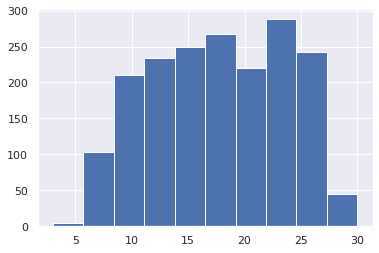

In [0]:
# Display median school score
df['school_score'].hist()
plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br id="group">

## Group sparse classes

The next heuristic we'll consider is grouping sparse classes in our categorical features. Opposed to the data cleaning notebook, when we group sparse classes in this notebook we are using domain knowledge more so than fixing spelling mistakes. 

<br>

#### Let's begin by plotting a countplot for <code style="color:steelblue">'exterior_walls'</code>

##### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

**Note:** plotting values on the y axis might be easier for you to read


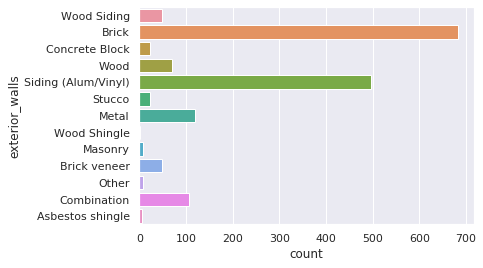

In [0]:
# Countplot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

#### Group <code style="color:crimson">'Wood Siding'</code> and <code style="color:crimson">'Wood Shingle'</code> into the existing <code style="color:crimson">'Wood'</code> value

##### series' `replace()` method parameters:
- `to_replace` (str, regex, list, dict, Series, int, float, or None): How to find the values that will be replaced.
- `value` (scalar, dict, list, str, regex, default None): Value to replace any values matching to_replace with. 
- `inplace` (boolean): default False, whether to replace values in place or to return a copy

```python 
df['feature'].replace(to_replace=['a_desired_value_to_replace', 'another_desired_value_to_replace'], value='desired_value', inplace=True)
```


In [0]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df['exterior_walls'].replace(to_replace=['Wood Siding', 'Wood Shingle'], value='Wood', inplace=True)

<br>

**Group <code style="color:crimson">'Stucco'</code>, <code style="color:crimson">'Asbestos shingle'</code>, <code style="color:crimson">'Concrete Block'</code>, and <code style="color:crimson">'Masonry'</code>into the existing <code style="color:crimson;">'Other'</code> value**

In [0]:
# List of classes to group
group_to_replace = ['Stucco', 'Asbestos shingle', 'Concrete Block', 'Masonry']

In [0]:
# Group other classes into 'Other'
df['exterior_walls'].replace(to_replace=group_to_replace, value='Other', inplace=True)

<br>

#### Now that we've grouped together sparse classes, let's look at the countplot for exterior walls again:

#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

**Note:** plotting values on the y axis might be easier for you to read

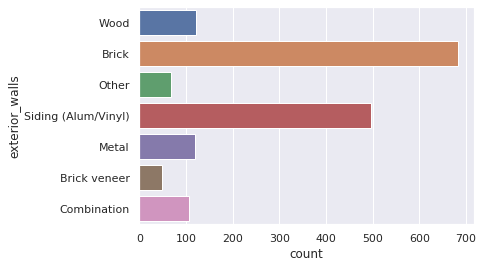

In [0]:
# countplot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

**Notice** the countplot has less categories, which can be beneficial for the machine learning algorithm

#### Display the countplot for `roof`
#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

**Note:** plotting values on the y axis might be easier for you to read

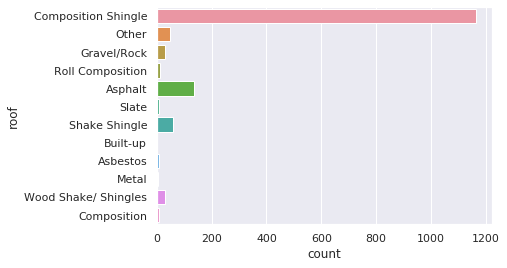

In [0]:
# Countplot for roof
sns.countplot(y='roof', data=df)
plt.show()

**As with the <code style="color:steelblue">'exterior_walls'</code> feature above, we can start by grouping classes that are quite similar.**

#### series' `replace()` method parameters:
- `to_replace` (str, regex, list, dict, Series, int, float, or None): How to find the values that will be replaced.
- `value` (scalar, dict, list, str, regex, default None): Value to replace any values matching to_replace with. 
- `inplace` (boolean): default False, whether to replace values in place or to return a copy



**Group <code style="color:crimson">'Composition'</code> and <code style="color:crimson">'Wood Shake/ Shingles'</code> into the <code style="color:crimson">'Composition Shingle'</code> class.**


In [0]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df['roof'].replace(to_replace=['Composition', 'Wood Shake/ Shingles'], value='Composition Shingle', inplace=True)

<br>

**Next, let's group remaining sparse classes into a single <code style="color:crimson">'Other'</code> class.**

**Group <code style="color:crimson">'Gravel/Rock'</code>, <code style="color:crimson">'Roll Composition'</code>, <code style="color:crimson">'Slate'</code>, <code style="color:crimson">'Built-up'</code>, <code style="color:crimson">'Asbestos'</code>, and <code style="color:crimson">'Metal'</code> into the <code style="color:crimson">'Other'</code> class.**

In [0]:
# List of classes to group
group_to_replace = ['Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal', 'Other']

# Group other classes into 'Other'
df['roof'].replace(to_replace=group_to_replace, value='Other', inplace=True)

**Finally, display count plot again.**

##### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

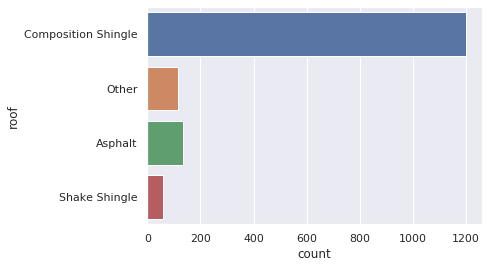

In [0]:
# Countplot for roof
sns.countplot(y='roof', data=df)

**Notice** the countplot has less categories, which can be beneficial for the machine learning algorithm

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>



<br id="dummy">

## Encode dummy variables

Python machine learning algorithms cannot handle categorical features directly. We will have to convert categorical variable into dummy/indicator variables, or variables that hold numerical values that represents categorical data in order for the computer to learn from these features. 

One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Technically, dummy variables are dichotomous, quantitative variables. Their range of values is small; they typically take on only two quantitative values, though sometimes can have more but the range should not have too many unique values. 

<br>

### Let's create a new dataframe with dummy variables for our categorical features

#### Pandas `get_dummies()` method parameters:
- `data` (array-like, Series, or DataFrame): Data of which to get dummy indicators.
- `columns` (string, or list of strings): default None; Column names in the DataFrame to be encoded.

#### pd.get_dummies() returns: 
- The one-hot encoded version of the `df` you passed in

**Note:** The new column names will be the old column name prepended before the categorical value name, seperated by underscores 

In order for the DataFrame to be updated with the one hot encoded columns we will have to reassign the original DataFrame with the return of the DataFrame's `get_dummies()` method.

For Example: 
```python
df = pd.get_dummies(data=df, columns=cols_to_encode)
```

#### **Make a list with the names of the columns that you want to encode. We will choose all of the categorical columns.**

Let us encode the following categorical columns (series):
- exterior_walls
- roof
- property_type

### Create a list variable `cols_to_encode` with the column names

In [0]:
cols_to_encode = ['exterior_walls', 'roof', 'property_type']

**Here's a more generic approach, in case your dataframe has 40 categorical columns and you would rather have python populate the list for you.**

```python 
generic_list = df.dtypes[df.dtypes == "object"].index
```

### Using `pd.get_dummies()` encode the specified columns (series) from the original DataFrame 

#### Pandas get_dummies() method parameters:
- `data` (array-like, Series, or DataFrame): Data of which to get dummy indicators.
- `columns` (string, or list of strings): default None; Column names in the DataFrame to be encoded.

In [0]:
# Create new dataframe with dummy features
df = pd.get_dummies(data= df, columns=cols_to_encode)

#### Display the first 5 rows of your dataframe to see these new features.

In [0]:
# First 5 rows of dataframe
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,0,1,0


<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<hr> 

<br id="remove">

## Remove unused or redundant features

**Finally, let's save the target variable and drop unused -or- redundant features from our dataset.**

**Save <code style="color:steelblue">'tx_year'</code> from your dataset, into the variable `target`.**

In [0]:
target = df['tx_price']

<br>

**Drop <code style="color:steelblue">'tx_price'</code> and <code style="color:steelblue">'year_built'</code> from your dataset.**

We will do this with using the DataFrame's `.drop()` method.

##### DataFrame's `drop()` parameters:
- `labels` (string or list of strings): index or column labels to drop
- `axis`  ({0 or ‘index’, 1 or ‘columns’}): default 0; whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
- `inplace` (bool): default False; If True, do operation inplace and return None.



In [0]:
# Drop 'tx_price' and 'year_built' from the dataset
df.drop(['tx_price', 'year_built'], axis=1, inplace=True)

<br>

##### Save the analytical base table and target!

Let's save the new dataframe using Pandas' <code style="color:steelblue">.to_csv()</code> function
- Pass in the value None as an argument to the `index` parameter, so that Pandas drops the indices and only stores the actual data in the CSV.

#### DataFrame's `to_csv()` Method Parameters:
- `path_or_buf` (string): File path of where to store DataFrame, if None is provided the result is returned as a string
- `index` (boolean or None): default True, Write row names (index).


### Save The Analytical Base DataFrame
- use the following argument value for the `path_or_buf` parameter:
```python
path_or_buf='./feature_engineered_real_estate.csv'
```


In [0]:
# Save analytical base table
df.to_csv(path_or_buf='./feature_engineered_real_estate.csv', index=None)

### Save The Target Variable DataFrame
- use the following argument value for the `path_or_buf` parameter:
```python
path_or_buf='./feature_engineered_real_estate.csv'
```

In [0]:
# Save Target
target.to_csv(path_or_buf='./feature_engineered_real_estate_target.csv', index=None)

<br>

### Final tip

Not all of the features you engineer need to be winners. 
* In fact, you'll often find that many of them do not add much value to your model. That's OK. 
* One highly predictive feature makes up for 10 duds, or a thing that fails to work properly or is otherwise unsatisfactory or worthless.

The key is choosing machine learning algorithms that can effectively select the best features among many options (**built-in feature selection**). This will allow you to avoid overfitting your model despite providing many input features. 

In addition we can always come back and re-perform data cleaning and feature engineering after we look at the models accuracy and precision. In fact we will be able to find out which features had bigger weights after we have made models. After we learn which features had bigger weights we can come back and rethink how to make a more accurate model. 

We'll cover this in the next module!


<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br>

## Next Steps

Congratulations for making through the Feature Engineering module!

As a reminder, here are a few things you did in this module:
* You made several indicator features from domain knowledge.
* You created the interaction feature <code style="color:steelblue">'property_age'</code>.
* You grouped sparse classes in the <code style="color:steelblue">'exterior_walls'</code> and <code style="color:steelblue">'roof'</code> features.
* And you encoded dummy variables and saved the final analytical base table.
* You dropped <code style="color:steelblue">'tx_price'</code> and <code style="color:steelblue">'year_built'</code> from your dataset.
* You exported the analytical base DataFrame and target DataFrame 


<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>